#  Divide the dataset in train/test
Make sure the ages with less representation are represented equaly in both dataset
The idea is to have a general test set that could be used for expression + methylation + image + Telemores classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
metadata_multi_omics =  pd.read_csv(r"../../metadata/sample_ids_multiomics_updated_tl_data.csv") #Note: Metadata are the samples where we have histological annotation

Rules for dividing into train and test

- Age below 45 -> 50%/50% (50% of the methylation dataset)
- Overall 80/20 train/test (20% of the methylation dataset)
- The test samples must be common to all tecnologies

### For Lung

In [5]:
metadata_multi_omics_lung = metadata_multi_omics[metadata_multi_omics["tissue"] == "Lung"]

## Samples in common 
metadata_multi_omics_lung_common = metadata_multi_omics_lung[(metadata_multi_omics_lung["gene_expression"] == 1) & 
                                                             (metadata_multi_omics_lung["metilation"] == 1) & 
                                                             (metadata_multi_omics_lung["metadata"] == 1) & 
                                                             (metadata_multi_omics_lung["telemore"] == 1)]
metadata_multi_omics_lung_common.shape

(139, 8)

139 Samples in common 

In [6]:
metadata_methylation_lung =  metadata_multi_omics_lung[metadata_multi_omics_lung["metilation"] == 1]
test_set_n_lung = metadata_methylation_lung.shape[0] * 0.2
test_set_n_lung = round(test_set_n_lung)
test_set_n_lung

43

Min Age:   20
Max Age:  70


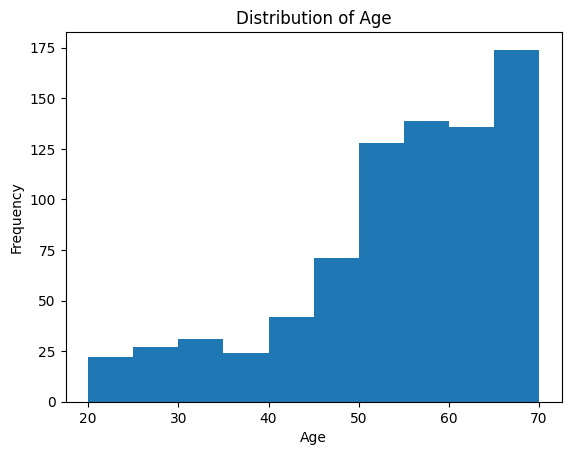

In [7]:
# Plot binned distribution of the entire dataset

print("Min Age:  ", metadata_multi_omics_lung["age"].min())
print("Max Age: ", metadata_multi_omics_lung["age"].max())

# set up bins for histogram
age_bins = range(20, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(metadata_multi_omics_lung["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# show the plot
plt.show()

In [8]:
# create age bins with 5-year width
RANDOMSTATE = 42
age_bins = np.arange(20, 76, 5)

# add a column with bin labels to the processed dataset
metadata_methylation_lung["age_bin"] = pd.cut(metadata_methylation_lung["age"], age_bins, labels=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6612\2472560669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_methylation_lung["age_bin"] = pd.cut(metadata_methylation_lung["age"], age_bins, labels=False)


In [9]:
# divide ages below 45 into two groups with 50/50 distribution. The test set must all be common between methylation and gene expression
young_ages = metadata_methylation_lung[metadata_methylation_lung["age"] <= 45]
young_ages_lung_n_test = round(young_ages.shape[0] * 0.5)

young_ages_common_samples = young_ages[(young_ages["gene_expression"] == 1) & (young_ages["metilation"] == 1) & (young_ages["telemore"] == 1) & (young_ages["metadata"] == 1)]
target_frac =young_ages_lung_n_test /  young_ages_common_samples.shape[0]
young_ages_test = young_ages_common_samples.groupby('age_bin', group_keys=False).apply(lambda x: x.sample(frac = target_frac, random_state=RANDOMSTATE))

In [10]:
# split the rest of the ages into train/test to get a overall 80/20 split
## Compute the remaining fraction 
old_ages = metadata_methylation_lung[metadata_methylation_lung["age"] > 45]
target_test_n = round(0.2* metadata_methylation_lung.shape[0])
old_ages_lung_n_test = target_test_n - young_ages_lung_n_test

old_ages_common_samples = old_ages[(old_ages["gene_expression"] == 1) & (old_ages["metilation"] == 1) &  (old_ages["telemore"] == 1) & (old_ages["metadata"] == 1)]
target_frac = old_ages_lung_n_test /  old_ages_common_samples.shape[0]
old_ages_test = old_ages_common_samples.groupby('age_bin', group_keys=False).apply(lambda x: x.sample(frac = target_frac, random_state=RANDOMSTATE))

In [11]:
# combine the young and old age groups for the final train/test datasets
test_data = pd.concat([old_ages_test, young_ages_test])

Plot sample age distribution in Methilation, gene expression and test set 

In [12]:
meth_train = metadata_multi_omics_lung[metadata_multi_omics_lung["metilation"] == 1].drop(test_data.index)
exp_train = metadata_multi_omics_lung[metadata_multi_omics_lung["gene_expression"] == 1].drop(test_data.index)
tl_train  = metadata_multi_omics_lung[metadata_multi_omics_lung["telemore"] == 1].drop(test_data.index)
hist_train  = metadata_multi_omics_lung[metadata_multi_omics_lung["metadata"] == 1].drop(test_data.index)

Min Age:   22
Max Age:  70


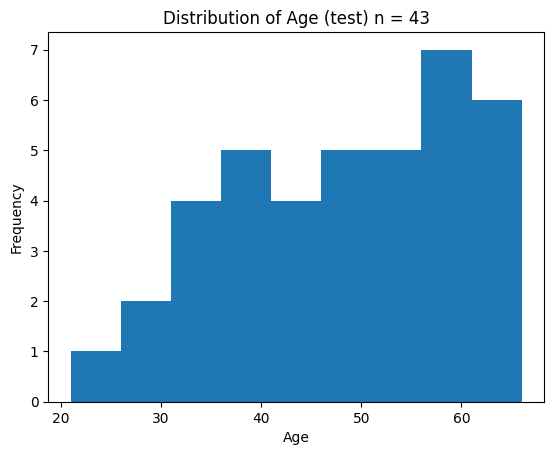

Min Age:   21
Max Age:  70


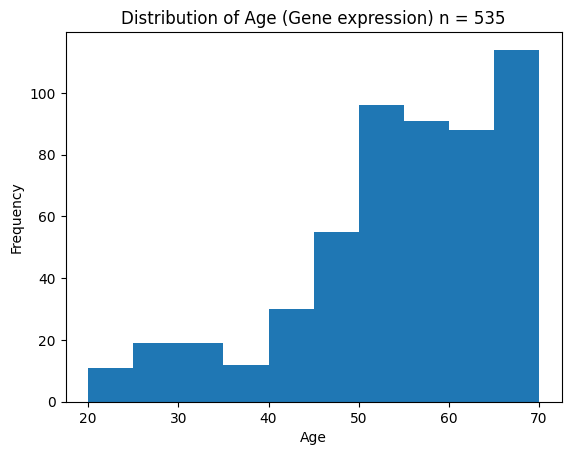

Min Age:   22
Max Age:  70


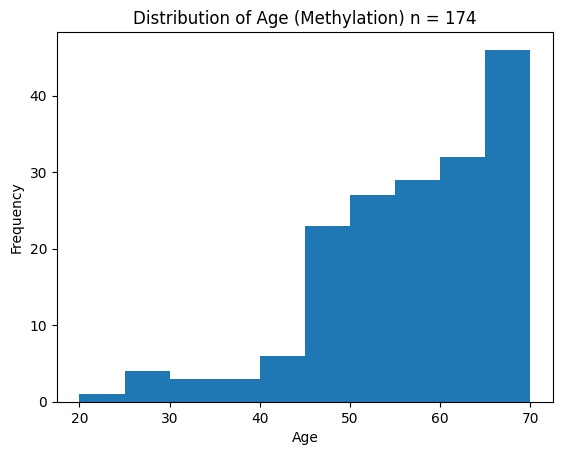

Min Age:   20
Max Age:  70


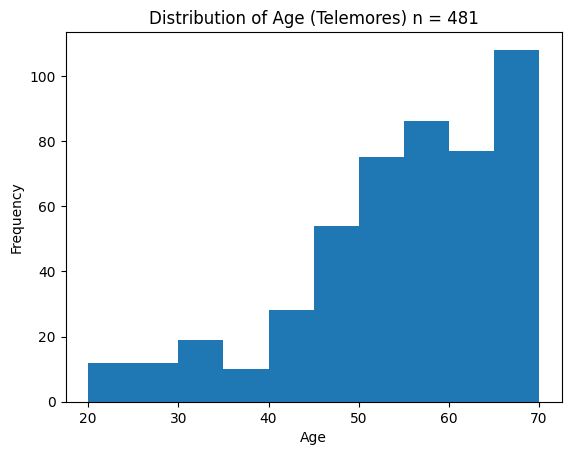

Min Age:   20
Max Age:  70


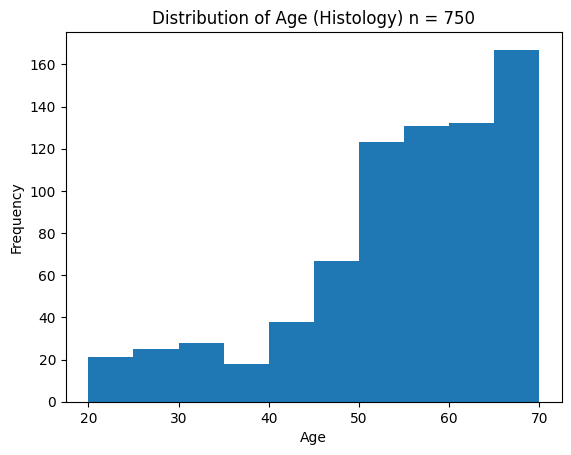

In [14]:
# Plot test sample distribution
# Plot binned distribution of the dataset

print("Min Age:  ", test_data["age"].min())
print("Max Age: ", test_data["age"].max())

# set up bins for histogram
age_bins = range(21, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(test_data["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age (test) n = " + str(test_data.shape[0]))
plt.xlabel("Age")
plt.ylabel("Frequency")

# show the plot
plt.show()


# Plot train (gene expression) sample distribution
# Plot binned distribution of the dataset

print("Min Age:  ", exp_train["age"].min())
print("Max Age: ", exp_train["age"].max())

# set up bins for histogram
age_bins = range(20, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(exp_train["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age (Gene expression) n = " + str(exp_train.shape[0]))
plt.xlabel("Age")
plt.ylabel("Frequency")

# show the plot
plt.show()

# Plot train (gene expression) sample distribution
# Plot binned distribution of the dataset

print("Min Age:  ", meth_train["age"].min())
print("Max Age: ", meth_train["age"].max())

# set up bins for histogram
age_bins = range(20, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(meth_train["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age (Methylation) n = " + str(meth_train.shape[0]))
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

# Plot train (Telemore data) sample distribution
# Plot binned distribution of the dataset

print("Min Age:  ", tl_train["age"].min())
print("Max Age: ", tl_train["age"].max())

# set up bins for histogram
age_bins = range(20, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(tl_train["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age (Telemores) n = " + str(tl_train.shape[0]))
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

# Plot train (Histology data) sample distribution
# Plot binned distribution of the dataset

print("Min Age:  ", hist_train["age"].min())
print("Max Age: ", hist_train["age"].max())

# set up bins for histogram
age_bins = range(20, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(hist_train["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age (Histology) n = " + str(hist_train.shape[0]))
plt.xlabel("Age")
plt.ylabel("Frequency")

# show the plot
plt.show()

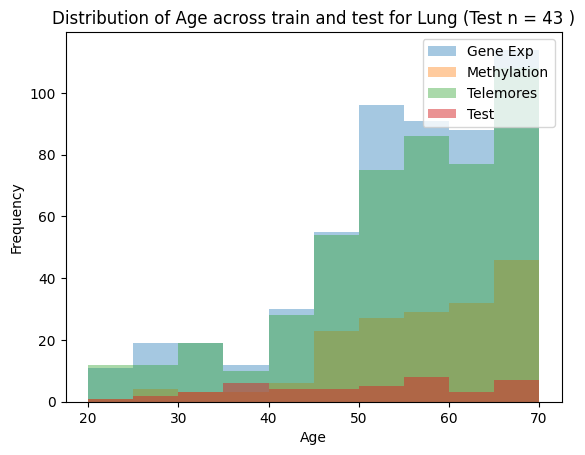

In [19]:
# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(exp_train["age"], bins=age_bins, alpha = 0.4, label = "Gene Exp")
plt.hist(meth_train["age"], bins=age_bins, alpha = 0.4, label = "Methylation")
#plt.hist(hist_train["age"], bins=age_bins, alpha = 0.4, label = "Histology")
plt.hist(tl_train["age"], bins=age_bins, alpha = 0.4, label = "Telemores")
plt.hist(test_data["age"], bins=age_bins, alpha = 0.5, label = "Test")


# set plot title and axis labels
plt.title(f"Distribution of Age across train and test for Lung (Test n = {str(test_data.shape[0])} )")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(loc='upper right')

# save the plot
plt.savefig("../../aging_notes/figures/1.train_test_sample_lung.png")

In [20]:
## Save train sets
test_data.to_csv("../../metadata/lung_test_metadata.csv", index=False)

In [21]:
test_data.shape

(43, 9)

### For Ovary

In [33]:
metadata_multi_omics_ovary = metadata_multi_omics[metadata_multi_omics["tissue"] == "Ovary"]

## Samples in common 
metadata_multi_omics_ovary_common = metadata_multi_omics_ovary[(metadata_multi_omics_ovary["gene_expression"] == 1) & 
                                                             (metadata_multi_omics_ovary["metilation"] == 1) & 
                                                             (metadata_multi_omics_ovary["metadata"] == 1) & 
                                                             (metadata_multi_omics_ovary["telemore"] == 1)]
metadata_multi_omics_ovary_common.shape

(117, 8)

124 Samples in common 

In [34]:
metadata_methylation_ovary =  metadata_multi_omics_ovary[metadata_multi_omics_ovary["metilation"] == 1]
test_set_n_ovary = metadata_methylation_ovary.shape[0] * 0.2
test_set_n_ovary = round(test_set_n_ovary)
test_set_n_ovary

32

Min Age:   21
Max Age:  70


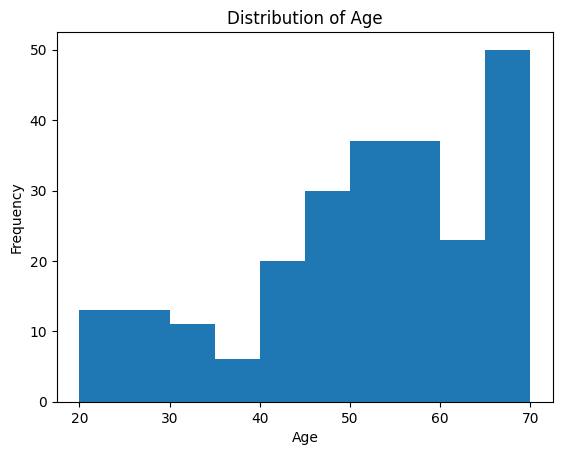

In [35]:
# Plot binned distribution of the entire dataset

print("Min Age:  ", metadata_multi_omics_ovary["age"].min())
print("Max Age: ", metadata_multi_omics_ovary["age"].max())

# set up bins for histogram
age_bins = range(20, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(metadata_multi_omics_ovary["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# show the plot
plt.show()

In [36]:
# create age bins with 5-year width
RANDOMSTATE = 42
age_bins = np.arange(20, 76, 5)

# add a column with bin labels to the processed dataset
metadata_methylation_ovary["age_bin"] = pd.cut(metadata_methylation_ovary["age"], age_bins, labels=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6612\244349268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_methylation_ovary["age_bin"] = pd.cut(metadata_methylation_ovary["age"], age_bins, labels=False)


In [38]:
# divide ages below 45 into two groups with 50/50 distribution. The test set must all be common between methylation and gene expression
young_ages = metadata_methylation_ovary[metadata_methylation_ovary["age"] <= 45]
young_ages_ovary_n_test = round(young_ages.shape[0] * 0.5)

young_ages_common_samples = young_ages[(young_ages["gene_expression"] == 1) & (young_ages["metilation"] == 1) & (young_ages["telemore"] == 1) & (young_ages["metadata"] == 1)]
target_frac =young_ages_ovary_n_test /  young_ages_common_samples.shape[0]
young_ages_test = young_ages_common_samples.groupby('age_bin', group_keys=False).apply(lambda x: x.sample(frac = target_frac, random_state=RANDOMSTATE))

In [39]:
# split the rest of the ages into train/test to get a overall 80/20 split
## Compute the remaining fraction 
old_ages = metadata_methylation_ovary[metadata_methylation_ovary["age"] > 45]
target_test_n = round(0.2* metadata_methylation_ovary.shape[0])
old_ages_ovary_n_test = target_test_n - young_ages_ovary_n_test

old_ages_common_samples = old_ages[(old_ages["gene_expression"] == 1) & (old_ages["metilation"] == 1) &  (old_ages["telemore"] == 1) & (old_ages["metadata"] == 1)]
target_frac = old_ages_ovary_n_test /  old_ages_common_samples.shape[0]
old_ages_test = old_ages_common_samples.groupby('age_bin', group_keys=False).apply(lambda x: x.sample(frac = target_frac, random_state=RANDOMSTATE))

In [40]:
# combine the young and old age groups for the final train/test datasets
test_data = pd.concat([old_ages_test, young_ages_test])

In [41]:
meth_train = metadata_multi_omics_ovary[metadata_multi_omics_ovary["metilation"] == 1].drop(test_data.index)
exp_train = metadata_multi_omics_ovary[metadata_multi_omics_ovary["gene_expression"] == 1].drop(test_data.index)
tl_train  = metadata_multi_omics_ovary[metadata_multi_omics_ovary["telemore"] == 1].drop(test_data.index)
hist_train  = metadata_multi_omics_ovary[metadata_multi_omics_ovary["metadata"] == 1].drop(test_data.index)

Min Age:   21
Max Age:  67


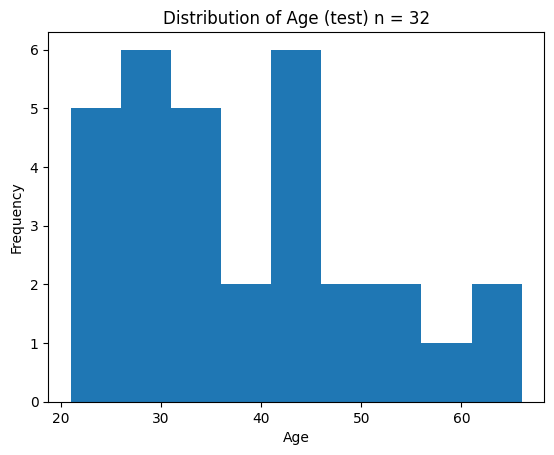

Min Age:   21
Max Age:  70


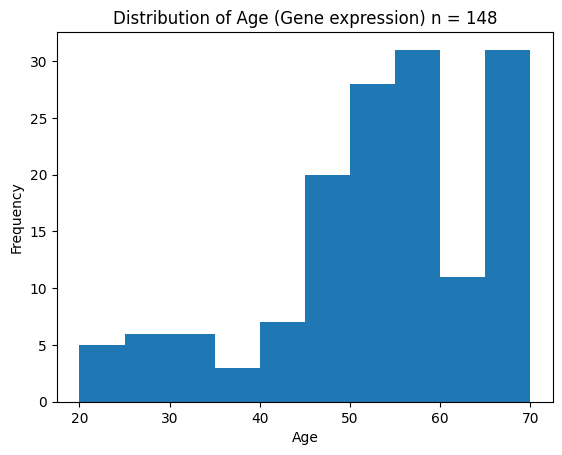

Min Age:   22
Max Age:  70


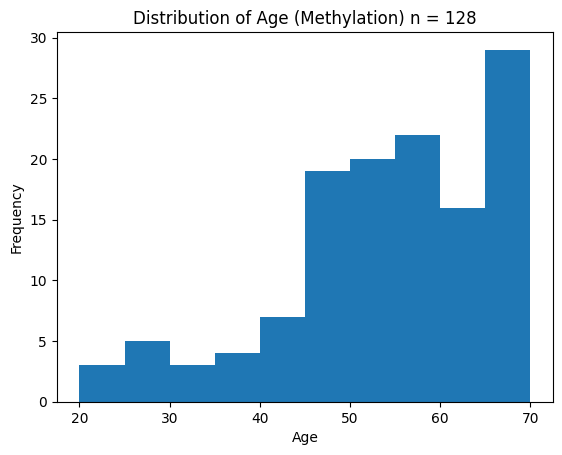

Min Age:   22
Max Age:  70


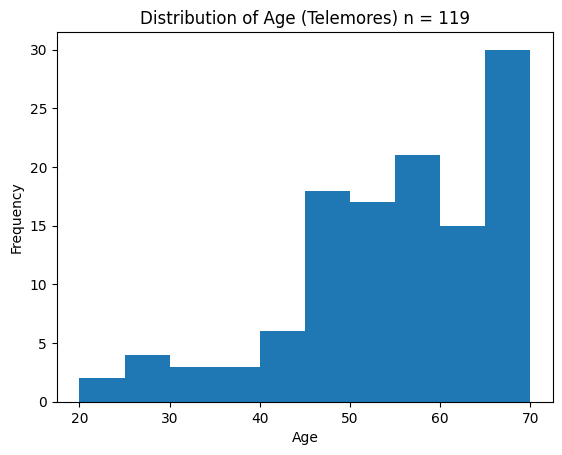

Min Age:   21
Max Age:  70


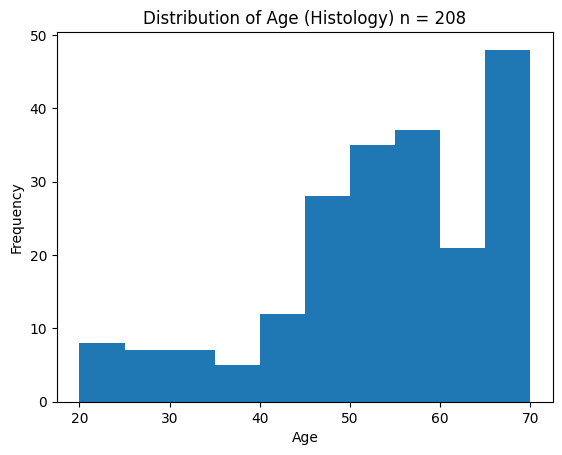

In [46]:
# Plot test sample distribution
# Plot binned distribution of the dataset

print("Min Age:  ", test_data["age"].min())
print("Max Age: ", test_data["age"].max())

# set up bins for histogram
age_bins = range(21, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(test_data["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age (test) n = " + str(test_data.shape[0]))
plt.xlabel("Age")
plt.ylabel("Frequency")

# show the plot
plt.show()


# Plot train (gene expression) sample distribution
# Plot binned distribution of the dataset

print("Min Age:  ", exp_train["age"].min())
print("Max Age: ", exp_train["age"].max())

# set up bins for histogram
age_bins = range(20, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(exp_train["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age (Gene expression) n = " + str(exp_train.shape[0]))
plt.xlabel("Age")
plt.ylabel("Frequency")

# show the plot
plt.show()

# Plot train (gene expression) sample distribution
# Plot binned distribution of the dataset

print("Min Age:  ", meth_train["age"].min())
print("Max Age: ", meth_train["age"].max())

# set up bins for histogram
age_bins = range(20, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(meth_train["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age (Methylation) n = " + str(meth_train.shape[0]))
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

# Plot train (Telemore data) sample distribution
# Plot binned distribution of the dataset

print("Min Age:  ", tl_train["age"].min())
print("Max Age: ", tl_train["age"].max())

# set up bins for histogram
age_bins = range(20, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(tl_train["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age (Telemores) n = " + str(tl_train.shape[0]))
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

# Plot train (Histology data) sample distribution
# Plot binned distribution of the dataset

print("Min Age:  ", hist_train["age"].min())
print("Max Age: ", hist_train["age"].max())

# set up bins for histogram
age_bins = range(20, 71, 5)

# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(hist_train["age"], bins=age_bins)

# set plot title and axis labels
plt.title("Distribution of Age (Histology) n = " + str(hist_train.shape[0]))
plt.xlabel("Age")
plt.ylabel("Frequency")

# show the plot
plt.show()

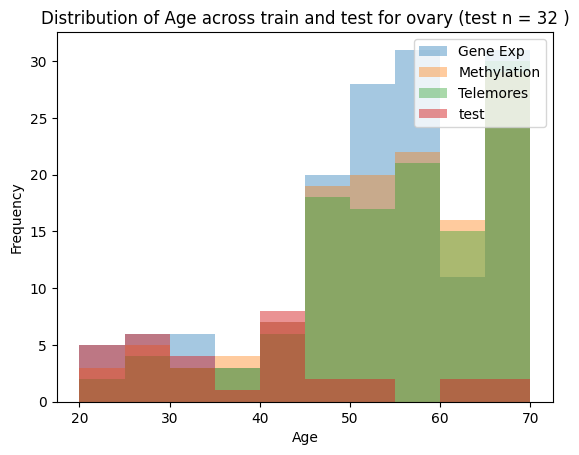

In [47]:
# plot a histogram of the "age" variable with 10 bins between 20 and 70
plt.hist(exp_train["age"], bins=age_bins, alpha = 0.4, label = "Gene Exp")
plt.hist(meth_train["age"], bins=age_bins, alpha = 0.4, label = "Methylation")
plt.hist(tl_train["age"], bins=age_bins, alpha = 0.4, label = "Telemores")
plt.hist(test_data["age"], bins=age_bins, alpha = 0.5, label = "test")


# set plot title and axis labels
plt.title(f"Distribution of Age across train and test for ovary (test n = {str(test_data.shape[0])} )")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(loc='upper right')

# save the plot
plt.savefig("../../aging_notes/figures/1.train_test_sample_ovary.png")

In [48]:
## Save train sets
test_data.to_csv("../../metadata/ovary_test_metadata.csv", index=False)